In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
PRED_DIR = os.path.join('../predictions/best_models')
GOLD_PATH = os.path.join('../data/GermEval21_Toxic_Test/truth.csv')
assert os.path.isdir(PRED_DIR)
assert os.path.isfile(GOLD_PATH)

In [3]:
gold_labels_df = pd.read_csv(GOLD_PATH, encoding='utf-8', sep=',')
gold_labels = gold_labels_df['Sub3_FactClaiming'].to_list()

In [4]:
cm_dict = {}
for folder in os.listdir(PRED_DIR):
    pred_path = os.path.join(PRED_DIR, folder, 'test.Sub3_FactClaiming.out')
    assert os.path.isfile(pred_path)
    with open(pred_path, 'r', encoding='utf-8') as f:
        predictions = list(map(lambda x: int(x.strip()), f.readlines()))
    cm_dict[folder] = confusion_matrix(y_true=gold_labels, y_pred=predictions)

In [5]:
cm_dict

{'monotask_bert-base-german-cased': array([[535,  95],
        [148, 166]], dtype=int64),
 'monotask_bert-base-multilingual-cased': array([[523, 107],
        [149, 165]], dtype=int64),
 'multitask_bert-base-german-cased': array([[543,  87],
        [143, 171]], dtype=int64)}

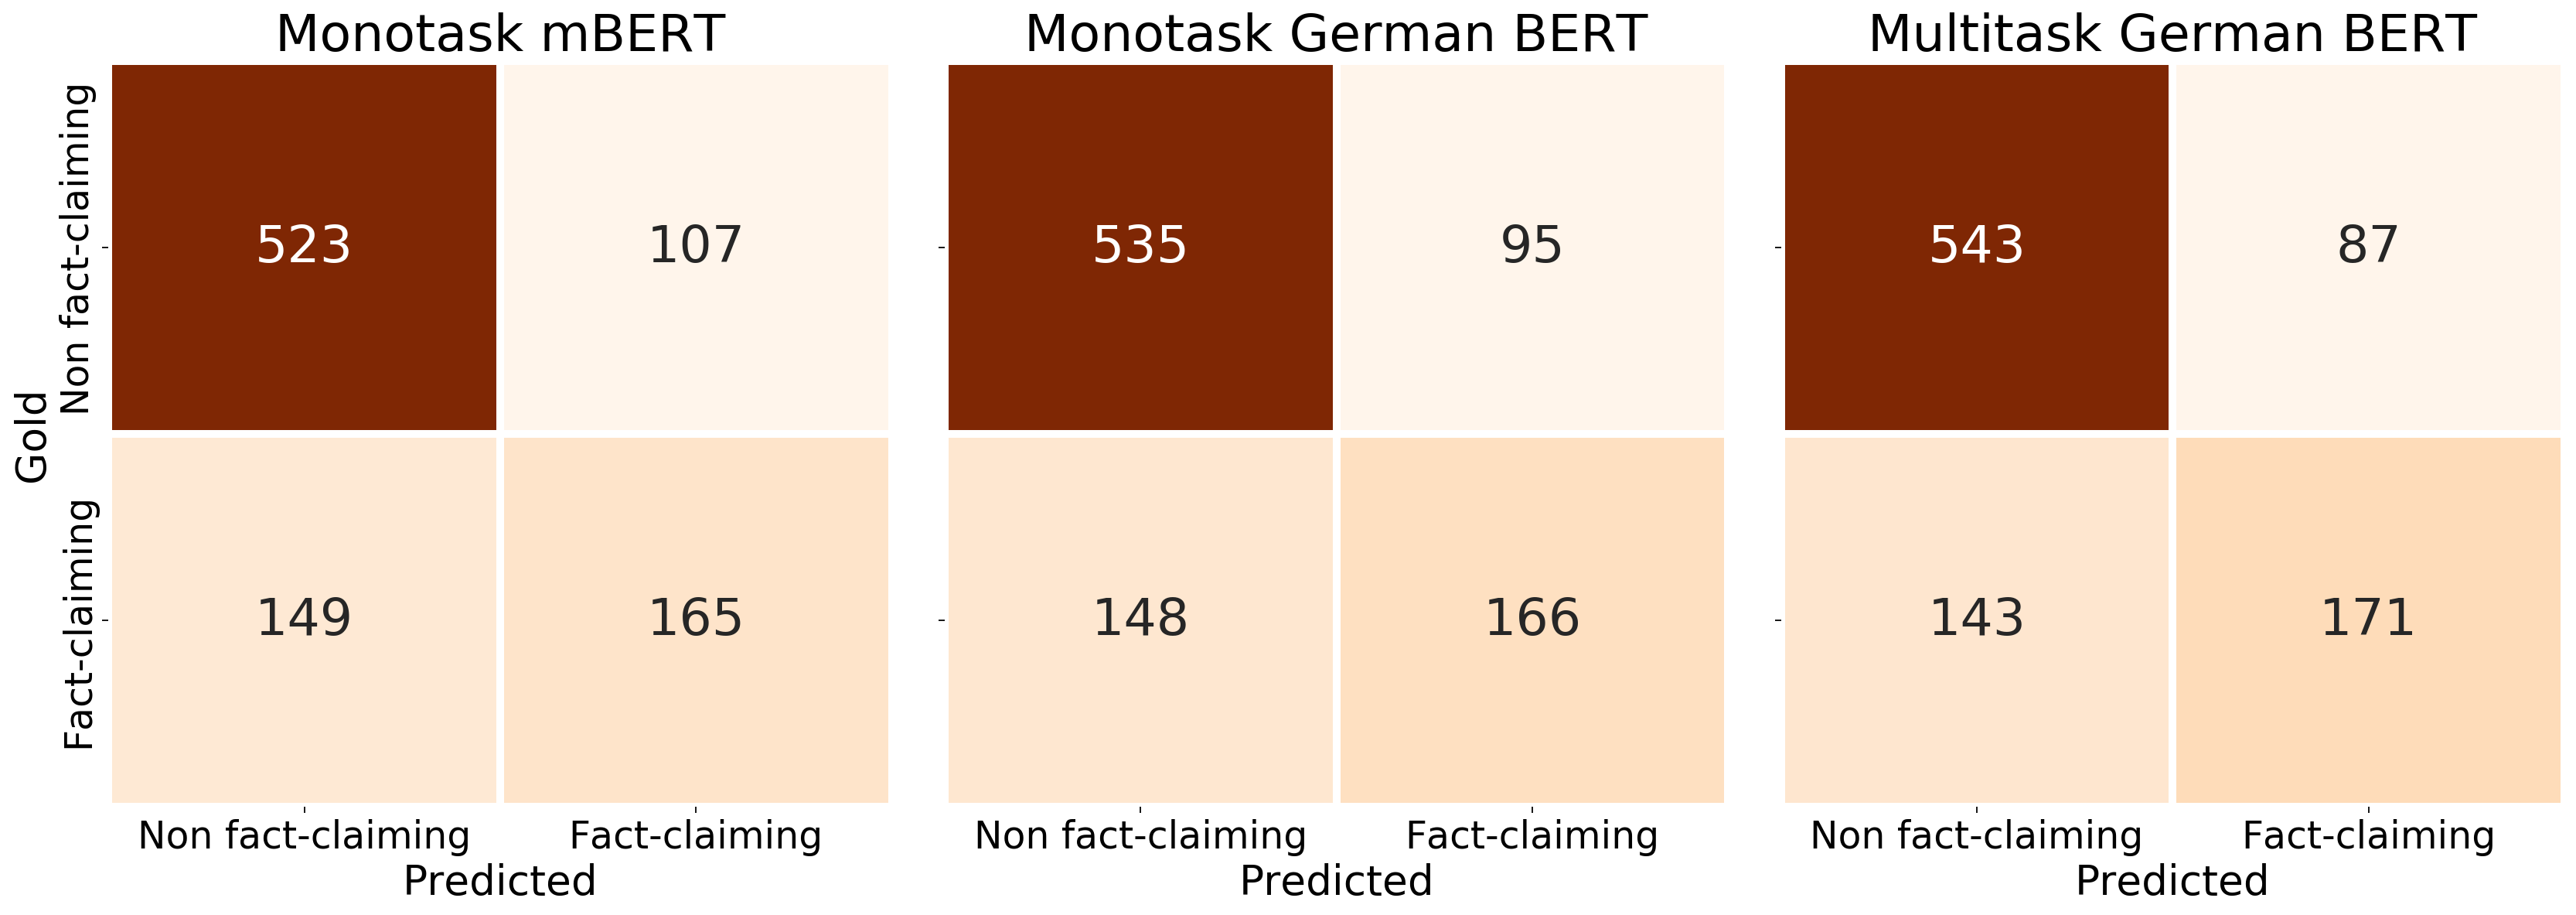

In [6]:
# plot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 7.5), dpi=160, sharex=True, sharey=True)
for idx, (k, v) in enumerate({
    'Monotask mBERT': 'monotask_bert-base-multilingual-cased',
    'Monotask German BERT': 'monotask_bert-base-german-cased',
    'Multitask German BERT': 'multitask_bert-base-german-cased',
}.items()):
    sns.heatmap(
        cm_dict[v],
        cmap=plt.cm.Oranges,
        annot=True,
        square=False,
        xticklabels=['Non fact-claiming', 'Fact-claiming'],
        yticklabels=['Non fact-claiming', 'Fact-claiming'],
        cbar=False,
        fmt='d',
        linewidths=4,
        annot_kws={"size": 30},
        ax=axs[idx],
    )
    axs[idx].set_xlabel('Predicted', fontsize=24)
    axs[idx].set_title(f'{k}', fontsize=30)
    axs[idx].set_xticklabels(axs[idx].get_xticklabels(), fontsize=22)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=22, va='center')
axs[0].set_ylabel('Gold', fontsize=24)
plt.tight_layout()
os.makedirs(os.path.join('../results'), exist_ok=True)
plt.savefig(os.path.join('../results/test_confusion_matrices.pdf'))
plt.show()